<a href="https://colab.research.google.com/github/vantuan5644/MachineLearningCourse/blob/master/LungCancerDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LUNA 2016 - Lung Nodeule Analysis**

- Objective: Detect the location of nodules from volunmetric CT images

- Dataset: [LUNA 2016 ](https://luna16.grand-challenge.org/Procedure/) 
which contains 888 CT scans from LIDC-IDRI database
  - The dataset had been divided into 10 subsets, subset0.zip to subset9.zip: 10 zip files which contain all CT images
  - annotations.csv: contains the annotations used as reference standard for the 'nodule detection'
  - candidates_V2.csv: csv file that contains an extended set of candidate locations for the 'false positive reduction' track
  



## Download and extract data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
%cd /content/drive/My Drive/LUNA2016

/content/drive/My Drive/LUNA2016


In [0]:
!wget https://zenodo.org/record/2604219/files/annotations.csv?download=1
!wget https://zenodo.org/record/2604219/files/candidates.csv?download=1
!wget https://zenodo.org/record/2604219/files/candidates_V2.zip?download=1
!wget https://zenodo.org/record/2604219/files/evaluationScript.zip?download=1
!wget https://zenodo.org/record/2604219/files/seg-lungs-LUNA16.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset0.zip?download=1


!wget https://zenodo.org/record/2604219/files/subset1.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset2.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset3.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset4.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset5.zip?download=1
!wget https://zenodo.org/record/2604219/files/subset6.zip?download=1

!wget https://zenodo.org/record/2596479/files/subset7.zip?download=1
!wget https://zenodo.org/record/2596479/files/subset8.zip?download=1
!wget https://zenodo.org/record/2596479/files/subset9.zip?download=1

In [0]:
target_dir = '/content/drive/My Drive/LUNA2016'
os.listdir(target_dir)

['annotations.csv',
 '.ipynb_checkpoints',
 'candidates.csv',
 'candidates_V2.zip',
 'evaluationScript.zip',
 'seg-lungs-LUNA16.zip',
 'subset0.zip',
 'dataset',
 'subset1.zip',
 'subset2.zip',
 'subset3.zip',
 'subset4.zip',
 'subset5.zip',
 'subset6.zip',
 'subset7.zip',
 'candidates_V2.csv',
 'evaluationScript',
 'seg-lungs-LUNA16',
 'subset8.zip',
 'subset9.zip',
 'input_shape.csv',
 'models']

In [0]:
import zipfile
target_dir = '/content/drive/My Drive/LUNA2016'

file_list = [ 'candidates_V2.zip', 'evaluationScript.zip', 'seg-lungs-LUNA16.zip',


]
for file in file_list:
  with zipfile.ZipFile(file, "r") as zip_ref:
      zip_ref.extractall(target_dir)

In [0]:
target_dir = '/content/drive/My Drive/LUNA2016/dataset'
base_dir = '/content/drive/My Drive/LUNA2016'
import subprocess

for i in range(10):
  file_name = 'subset' + str(i) + '.zip'
  print("Extracting: ", file_name)
  file_path = os.path.join(base_dir, file_name)
  if not os.path.isfile(file_path):
      os.rename(file_path + '?download=1', file_path)
  print("Extract dir: ", target_dir + '/subset' + str(i))
  subprocess.call(['7z', 'x', file_path, '-o' + target_dir])


Extracting:  subset9.zip
Extract dir:  /content/drive/My Drive/LUNA2016/dataset/subset9


2

### Check for MD5



In [0]:
base_path = '/content/drive/My Drive/LUNA2016/'
import hashlib

for i in range(10):
  file_name = 'subset' + str(i) + '.zip'
  file_path = os.path.join(base_path, file_name)
  print(hashlib.md5(open(file_path,'rb').read()).hexdigest())


1065b0f42b8c25cf29260fd924a3c3a2
2eda28bb123543074f5cd849499b87ff
685b484b085bcdb81c525f3b1bf97c51
54707e9e8954af29326eed60f38ea321
98225ccb1a41fc434631f63f4284796a
7eac8ee510ad15197a6231472562d1ae
d162df1444a6f2674ab8273c7f9e1520
88b75a724b22a62305f19d23dd154477
38260ca9a8741888997bcebedfabc3f1
fe764087eca0efb142f208e0f93f101b


In [0]:
# md5:1065b0f42b8c25cf29260fd924a3c3a2 
# md5:2eda28bb123543074f5cd849499b87ff 
# md5:685b484b085bcdb81c525f3b1bf97c51 
# md5:54707e9e8954af29326eed60f38ea321 
# md5:98225ccb1a41fc434631f63f4284796a 
# md5:7eac8ee510ad15197a6231472562d1ae 
# md5:d162df1444a6f2674ab8273c7f9e1520 
# md5:88b75a724b22a62305f19d23dd154477 
# md5:38260ca9a8741888997bcebedfabc3f1 
# md5:fe764087eca0efb142f208e0f93f101b 

# Preprocessing data

The data consists of many 2D slices which, when combined, produce a 3D rendering of whatever was scanned

#### The labels


In [0]:
import pandas as pd

In [3]:
candidates = pd.read_csv('/content/drive/My Drive/LUNA2016/candidates_V2.csv')
print("Nof unique uid:", candidates.seriesuid.nunique())
candidates

Nof unique uid: 888


,seriesuid,coordX,coordY,coordZ,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,68.420000,-74.480000,-288.700000,0
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-95.209361,-91.809406,-377.426350,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-24.766755,-120.379294,-273.361539,0
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-63.080000,-65.740000,-344.240000,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,52.946688,-92.688873,-241.067872,0
...,...,...,...,...,...
754970,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-33.400000,-64.200000,-115.560000,0
754971,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,56.236359,70.352400,-203.446236,0
754972,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-97.104221,55.738289,-203.879785,0
754973,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-65.470000,59.670000,-136.370000,0


In [4]:
print("Number of unique cancer cases:", candidates[candidates['class'] == 1].seriesuid.nunique())
candidates[candidates['class'] == 1]

Number of unique cancer cases: 600


,seriesuid,coordX,coordY,coordZ,class
436,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,104.083933,-211.755826,-227.017987,1
1009,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.982091,-175.176790,-298.510192,1
2053,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.974375,-141.066875,876.777280,1
3633,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,1.790000,166.340000,-408.880000,1
3707,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,1.859783,172.221534,-405.366447,1
...,...,...,...,...,...
754090,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-29.720000,24.620000,-156.010000,1
754622,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,42.895122,74.251037,-200.625978,1
754755,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-28.685000,32.690000,-164.835000,1
754947,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,-23.719297,31.714489,-156.172233,1


Annotations is the file that contains locations and diameter (in mm) of the nodules

In [5]:
annotations = pd.read_csv('/content/drive/My Drive/LUNA2016/annotations.csv')
annotations

,seriesuid,coordX,coordY,coordZ,diameter_mm
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,-128.699421,-175.319272,-298.387506,5.651471
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,103.783651,-211.925149,-227.121250,4.224708
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,69.639017,-140.944586,876.374496,5.786348
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,-24.013824,192.102405,-391.081276,8.143262
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,2.441547,172.464881,-405.493732,18.545150
...,...,...,...,...,...
1181,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-160.856298,-28.560349,-269.168728,5.053694
1182,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-102.189570,-73.865766,-220.536241,4.556101
1183,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,-37.535409,64.041949,-127.687101,4.357368
1184,1.3.6.1.4.1.14519.5.2.1.6279.6001.997611074084...,43.196112,74.438486,-200.523314,4.277203


In [6]:
candidates.seriesuid.nunique()

888

So there are **888** unique ID in the candidates, that means we have 888 patients in the dataset

#### Discovering the data subsets

Because our training data is divided into 10 hold-out folds, so we need to need to discover a little bit about the data inside each subset (number of images, number of patients)

In [0]:
base_path = '/content/drive/My Drive/LUNA2016'


In [0]:
import glob
import os
from fnmatch import fnmatch

root = os.path.join(base_path, 'dataset')
pattern = "*.mhd"

images_list = []
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            images_list.append(os.path.join(path, name))

In [9]:
len(images_list)

884

Because we only use the data in MHD extension so we exclude the .raw files from our list

In [10]:
training_list = []
validation_list = []
test_list = []
images_list = []
for i in range(10):
  subset_name = 'subset' + str(i)
  
  subset_path = os.path.join(base_path, 'dataset', subset_name)
  # images_list = sorted(os.listdir(subset_path))
  images_list_small = glob.glob(os.path.join(subset_path, '*.mhd'))

  print(f"Subset {i} contains {len(images_list_small)} images of {len(set(images_list_small))} different patients")

  images_list += (images_list_small)

for i in range(7):
  subset_name = 'subset' + str(i)
  
  subset_path = os.path.join(base_path, 'dataset', subset_name)
  # images_list = sorted(os.listdir(subset_path))
  images_list_small = glob.glob(os.path.join(subset_path, '*.mhd'))
  training_list += (images_list_small)

for i in range(7,8):
  subset_name = 'subset' + str(i)
  
  subset_path = os.path.join(base_path, 'dataset', subset_name)
  # images_list = sorted(os.listdir(subset_path))
  images_list_small = glob.glob(os.path.join(subset_path, '*.mhd'))
  validation_list += (images_list_small)

for i in range(8,10):
  subset_name = 'subset' + str(i)
  
  subset_path = os.path.join(base_path, 'dataset', subset_name)
  # images_list = sorted(os.listdir(subset_path))
  images_list_small = glob.glob(os.path.join(subset_path, '*.mhd'))
  test_list += (images_list_small)

Subset 0 contains 89 images of 89 different patients
Subset 1 contains 89 images of 89 different patients
Subset 2 contains 89 images of 89 different patients
Subset 3 contains 89 images of 89 different patients
Subset 4 contains 89 images of 89 different patients
Subset 5 contains 89 images of 89 different patients
Subset 6 contains 89 images of 89 different patients
Subset 7 contains 89 images of 89 different patients
Subset 8 contains 88 images of 88 different patients
Subset 9 contains 84 images of 84 different patients


In [11]:
print(len(images_list), len(set(images_list)))

884 884


### Divide into training set, validation set, test set

In [12]:
print(len(training_list), len(set(training_list)))
print(len(validation_list), len(set(validation_list)))
print(len(test_list), len(set(test_list)))

623 623
89 89
172 172


So we have **884** unique scans in our data after extracting the zip files. Basically its not a big deal 

## Discovering data shape

In [0]:
img_shape = {}
for i, img_path in enumerate(images_list):
  img = load_image(img_path)
  img_shape[i] = {}
  img_shape[i][0] = img.shape[0]
  img_shape[i][1] = img.shape[1]
  img_shape[i][2] = img.shape[2]


In [0]:
# input_shape = pd.DataFrame(img_shape).T
# input_shape.to_csv(os.path.join(base_path, 'input_shape.csv'))
input_shape = os.path.join(base_path, 'input_shape.csv')
if os.path.isfile(input_shape):
  input_shape = pd.read_csv(input_shape)


In [0]:
input_shape

,0,1,2
0,121,512,512
1,119,512,512
2,161,512,512
3,538,512,512
4,124,512,512
...,...,...,...
879,158,512,512
880,133,512,512
881,114,512,512
882,350,512,512


In [0]:
input_shape.describe()

,0,1,2
count,884.000000,884.0,884.0
mean,255.881222,512.0,512.0
std,133.747055,0.0,0.0
min,95.000000,512.0,512.0
25%,137.750000,512.0,512.0
50%,237.500000,512.0,512.0
75%,305.000000,512.0,512.0
max,764.000000,512.0,512.0


The number of slices per scan is quite different. That's one problem we need to tackle before defining model's structure

## Exploratory Data Analysis

In [0]:
base_path = '/content/drive/My Drive/LUNA2016'

In [14]:
!pip3 install SimpleITK

     |████████████████████████████████| 42.5MB 106kB/s 


In [0]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import csv

Steps to load .mhd images:
 - Open the image
 - Store it into a numpy array
 - Extract the following info: Pixel Spacing, Origin, PixelSpacing


In [0]:
def load_itk_image(file_name):
  itkimage = sitk.ReadImage(file_name)
  numpyImage = sitk.GetArrayFromImage(itkimage)

  numpyOrigin = np.array(list(reversed(itkimage.GetOrigin())))
  numpySpacing = np.array(list(reversed(itkimage.GetSpacing())))

  return numpyImage, numpyOrigin, numpySpacing

Since the coordinates of the candidates are given in World Coordinates, we now need to transform from world coornidates to voxel coordinates by using the Origin and the the Pixel Spacing .

The transformation is only valid if there is no rotation component in the transformation matrix

In [0]:
def worldToVoxelCoord(worldCoord, origin, spacing):
  stretchedVoxelCoord  = np.absolute(worldCoord - origin)
  voxelCoord = stretchedVoxelCoord / spacing
  return voxelCoord

In [0]:
def voxelToWorldCoor(voxel_coordinates, origin, spacing):
    stretched_voxel_coordinates = voxel_coordinates * spacing
    world_coordinates = stretched_voxel_coordinates + origin
    return world_coordinates


Get pixels Hounsfield Units, which is a measure of radiodensity. CT scanners are carefully calibrated to accurately measure this. From Wikipedia

| Substance 	| HU 	|
|-----------------------	|-------------------------------------------------	|
| Air 	| -1000 	|
| Lung 	| -500 	|
| Fat 	| -100 to -50 	|
| Water 	| 0 	|
| CSF 	| 15 	|
| Kidney 	| 30 	|
| Blood 	| +30 to +45 	|
| Muscle 	| +10 to +40 	|
| Grey matter 	| +37 to +45 	|
| White matter 	| +20 to +30 	|
| Liver 	| +40 to +60 	|
| Soft Tissue, Contrast 	| +100 to +300 	|
| Bone 	| +700 (cancellous bone) to +3000 (cortical bone) 	|




Some scanners have cylindrical scanning bounds, but the output image is square. The pixels that fall outside of these bounds get the fixed value -3024


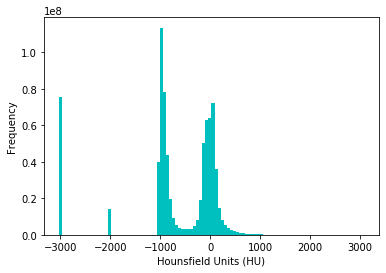

In [0]:
#@title Pixel density histogram (over first 100 CT scans) { vertical-output: true }
plt.hist(img.flatten(), bins=100, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()


Because in CT images the min value for most scanners in an image is -3000 (or some equivalent very low value). This is because while air has a HU value of -1000, the scanners have a circular field of view they get image data over. Outside that FOV, they set the data to this "low" value to indicate it's not actual real scanned data. You can see this in your image here, where there is the body, the air outside the body (the mid-grey values - around -1000 HU), then the black values outside of that circular region (which are probably around -3000 HU).

In [0]:
import skimage.io as io
def load_image(img_path):
  img = io.imread(img_path, plugin='simpleitk')
  img[img < -1500] = 0
  return img

In [0]:
# img = []
# for i, img_path in enumerate(images_list):
#   if i > 10:
#     break
#   img.append(load_image(img_path))

In [0]:
# import itertools
# img = list(itertools.chain(*img))
img = load_image(images_list_small[0])
img = np.array(img)

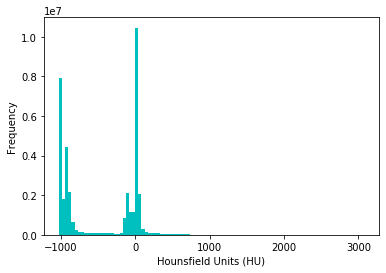

In [0]:
plt.hist(img.flatten(), bins=100, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()


The HU density histogram after removing the points that out of CT scanner's Field of View

#### Visualizing one random patient in 2D plane

In [0]:
img_filename = images_list[1]
img_path = os.path.join(subset_path, img_filename)

In [0]:
numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)
print(numpyImage.shape)
print(numpyOrigin)
print(numpySpacing)

(119, 512, 512)
[-313.75 -190.   -182.5 ]
[2.5        0.74218798 0.74218798]


In [0]:
series_uid = os.path.splitext(img_filename)[0]
cands = candidates[candidates['seriesuid'] == series_uid]

In [0]:
img = load_image(img_path)

In [0]:
import matplotlib

def plot_ct_scan(scan):
  f, plots = plt.subplots(int(scan.shape[0] / 20) + 1, 4, figsize=(25, 25))
  for i in range(0, scan.shape[0], 5):
    plots[int(i / 20), int((i % 20) / 5)].axis('off')
    plots[int(i / 20), int((i % 20) / 5)].imshow(scan[i], cmap=plt.cm.bone) 


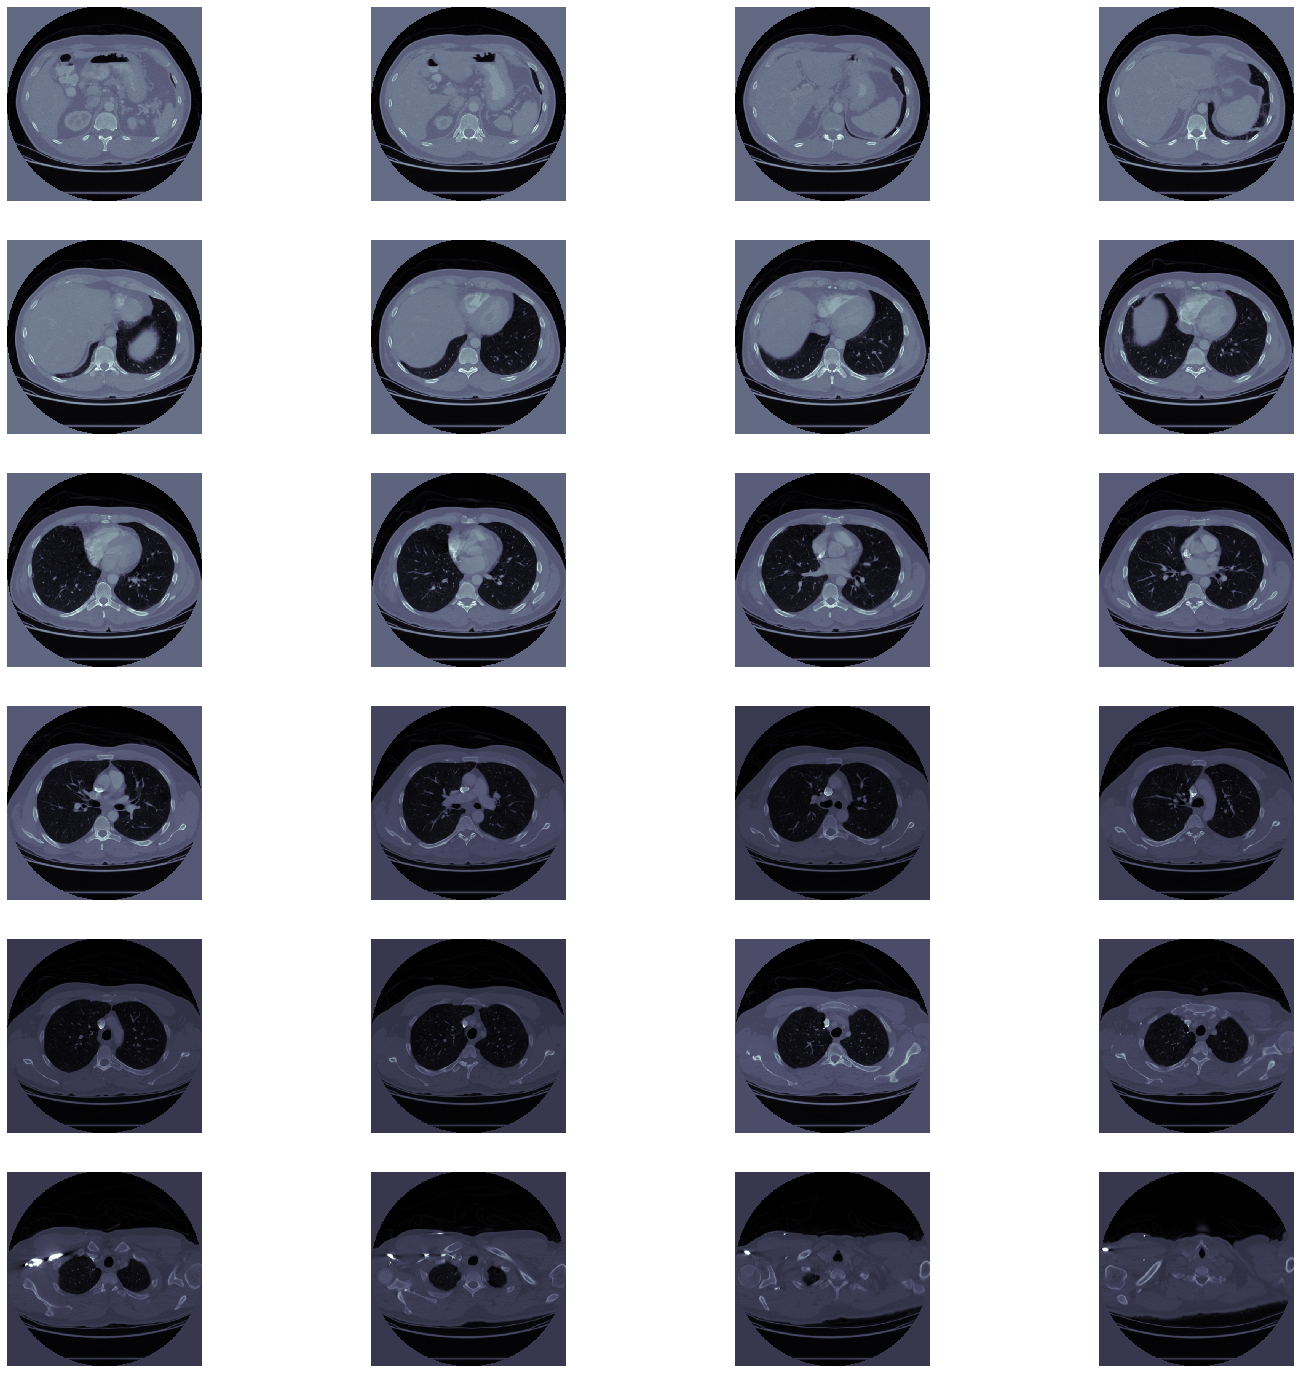

In [0]:
plot_ct_scan(img)

#### Visualize in 3D

In [0]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure

def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    
    verts, faces, x, y = measure.marching_cubes_lewiner(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()


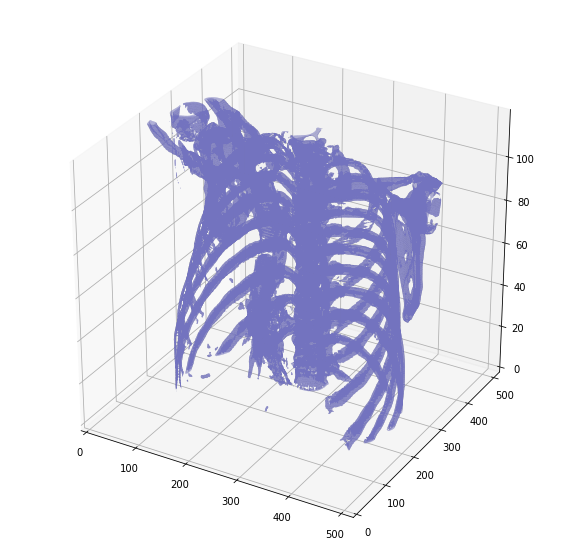

In [0]:
plot_3d(img, 400)


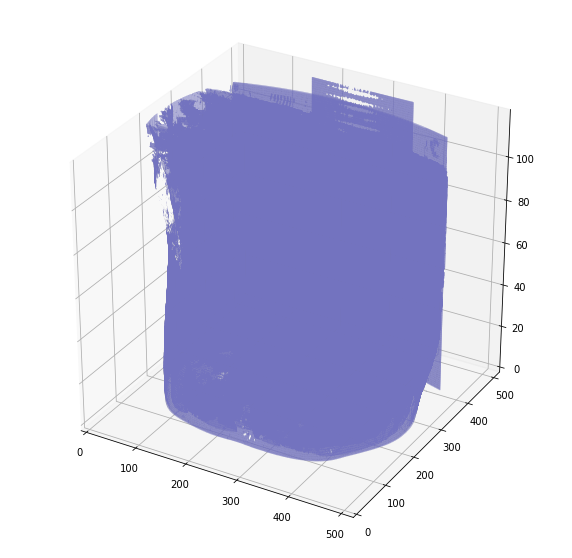

In [0]:
plot_3d(img, 0)

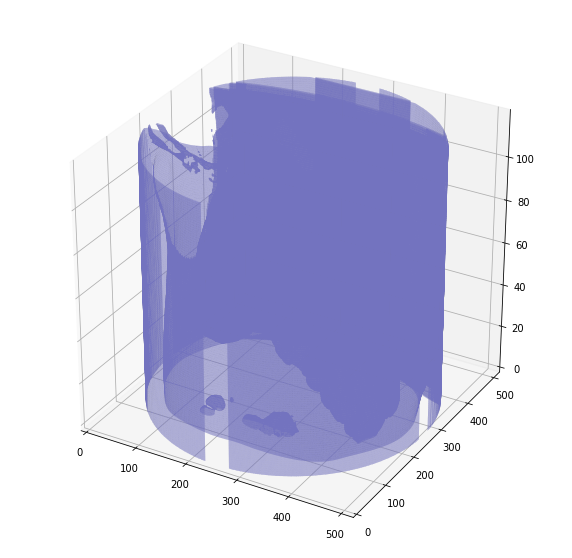

In [0]:
plot_3d(img, -320)

With the HU table about radiodensity and the 3D figures above. We can see that the lung could be segmented just by using HU unit (or pixel density). We will use some other techniques (Image Processing methods and CNN methods) for lung-segmentation below

# LUNA Preprocess

In [0]:
import numpy as np
import pandas as pd
import os

from skimage.segmentation import clear_border
from skimage.measure import label, regionprops, perimeter
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, \
    reconstruction, binary_closing
from skimage.filters import roberts, sobel
from scipy import ndimage as ndi

from glob import glob
from tqdm import tqdm

import SimpleITK as sitk
import scipy.misc
import matplotlib.pyplot as plt


## Load CT scans, convert from World coords to Voxel coords

In [0]:
def load_itk(filename):
    itkimage = sitk.ReadImage(filename)
    ct_scan = sitk.GetArrayFromImage(itkimage)
    origin = np.array(list(reversed(itkimage.GetOrigin())))
    spacing = np.array(list(reversed(itkimage.GetSpacing())))
    return ct_scan, origin, spacing


In [0]:
def world_2_voxel(world_coordinates, origin, spacing):
    stretched_voxel_coordinates = np.absolute(world_coordinates - origin)
    voxel_coordinates = stretched_voxel_coordinates / spacing
    return voxel_coordinates


In [0]:
def voxel_2_world(voxel_coordinates, origin, spacing):
    stretched_voxel_coordinates = voxel_coordinates * spacing
    world_coordinates = stretched_voxel_coordinates + origin
    return world_coordinates


## Get Segemented Lung 

In [0]:
def get_segmented_lungs(im, plot=False):
    binary = im < 604
    cleared = clear_border(binary)
    label_image = label(cleared)
    areas = [r.area for r in regionprops(label_image)]
    areas.sort()
    if len(areas) > 2:
        for region in regionprops(label_image):
            if region.area < areas[-2]:
                for coordinates in region.coords:
                    label_image[coordinates[0], coordinates[1]] = 0
    binary = label_image > 0
    selem = disk(2)
    binary = binary_erosion(binary, selem)
    selem = disk(10)
    binary = binary_closing(binary, selem)
    edges = roberts(binary)
    binary = ndi.binary_fill_holes(edges)
    get_high_vals = binary == 0
    im[get_high_vals] = 0
    return im


In [0]:
def segment_lung_from_ct_scan(ct_scan):
    return np.asarray([get_segmented_lungs(slice) for slice in ct_scan])


## Create the lung-mask

In [0]:
def seq(start, stop, step=1):
    n = int(round((stop - start) / float(step)))
    if n > 1:
        return ([start + step * i for i in range(n + 1)])
    else:
        return ([])


In [0]:
def draw_circles(image, cands, origin, spacing):
    # make empty matrix, which will be filled with the mask
    RESIZE_SPACING = [1, 1, 1]
    image_mask = np.zeros(image.shape)

    # run over all the nodules in the lungs
    for ca in cands.values:
        # get middel x-,y-, and z-worldcoordinate of the nodule
        radius = np.ceil(ca[4]) / 2
        coord_x = ca[1]
        coord_y = ca[2]
        coord_z = ca[3]
        image_coord = np.array((coord_z, coord_y, coord_x))

        # determine voxel coordinate given the worldcoordinate
        image_coord = world_2_voxel(image_coord, origin, spacing)

        # determine the range of the nodule
        noduleRange = seq(-radius, radius, RESIZE_SPACING[0])

        # create the mask
        for x in noduleRange:
            for y in noduleRange:
                for z in noduleRange:
                    coords = world_2_voxel(np.array((coord_z + z, coord_y + y, coord_x + x)), origin, spacing)
                    if (np.linalg.norm(image_coord - coords) * RESIZE_SPACING[0]) < radius:
                        image_mask[int(np.round(coords[0])), int(np.round(coords[1])), int(np.round(coords[2]))] = int(
                            1)

    return image_mask


## Create the nodule mask

In [0]:
def create_nodule_mask(imagePath, cands, fcount, subsetnum, final_lung_mask, final_nodule_mask):
    # if os.path.isfile(imagePath.replace('original',SAVE_FOLDER_image)) == False:
    img, origin, spacing = load_itk(imagePath)
    # calculate resize factor
    RESIZE_SPACING = [1, 1, 1]
    resize_factor = spacing / RESIZE_SPACING
    new_real_shape = img.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize = new_shape / img.shape
    new_spacing = spacing / real_resize

    # resize image
    lung_img = scipy.ndimage.interpolation.zoom(img, real_resize)

    # Segment the lung structure
    lung_img = lung_img + 1024
    lung_mask = segment_lung_from_ct_scan(lung_img)
    lung_img = lung_img - 1024

    # create nodule mask
    nodule_mask = draw_circles(lung_img, cands, origin, new_spacing)

    lung_img_512, lung_mask_512, nodule_mask_512 = np.zeros((lung_img.shape[0], 512, 512)), np.zeros(
        (lung_mask.shape[0], 512, 512)), np.zeros((nodule_mask.shape[0], 512, 512))

    original_shape = lung_img.shape
    i_start = 0
    i_end = 0
    flag = 0
    for z in range(lung_img.shape[0]):
        offset = (512 - original_shape[1])
        upper_offset = int(np.round(offset / 2))
        lower_offset = int(offset - upper_offset)

        new_origin = voxel_2_world([-upper_offset, -lower_offset, 0], origin, new_spacing)

        lung_mask_512[z, upper_offset:-lower_offset, upper_offset:-lower_offset] = lung_mask[z, :, :]
        nodule_mask_512[z, upper_offset:-lower_offset, upper_offset:-lower_offset] = nodule_mask[z, :, :]

    # save images.
    np.save(os.path.join(OUTPUT_PATH, "lung_mask_%04d_%04d.npy" % (subsetnum, fcount)), lung_mask_512)
    np.save(os.path.join(OUTPUT_PATH, "nodule_mask_%04d_%04d.npy" % (subsetnum, fcount)), nodule_mask_512)
    return final_lung_mask,final_nodule_mask



# Lung segmentation

In [0]:
LUNA_DATA_PATH = os.path.join(base_path, 'dataset')
OUTPUT_PATH = os.path.join(LUNA_DATA_PATH, 'masks')

In [0]:
final_lung_mask = np.zeros((1, 512, 512))
final_nodule_mask = np.zeros((1, 512, 512))


In [27]:
FILE_LIST = []
for i in range(10):
    LUNA_SUBSET_PATH = os.path.join(LUNA_DATA_PATH, f'subset{i}')
    print(LUNA_SUBSET_PATH)
    FILE_LIST.append(glob(os.path.join(LUNA_SUBSET_PATH, '*.mhd')))



/content/drive/My Drive/LUNA2016/dataset/subset0
/content/drive/My Drive/LUNA2016/dataset/subset1
/content/drive/My Drive/LUNA2016/dataset/subset2
/content/drive/My Drive/LUNA2016/dataset/subset3
/content/drive/My Drive/LUNA2016/dataset/subset4
/content/drive/My Drive/LUNA2016/dataset/subset5
/content/drive/My Drive/LUNA2016/dataset/subset6
/content/drive/My Drive/LUNA2016/dataset/subset7
/content/drive/My Drive/LUNA2016/dataset/subset8
/content/drive/My Drive/LUNA2016/dataset/subset9


In [0]:
# Helper function to get rows in data frame associated with each file
def get_filename(file_list, case):
    for f in file_list:
        if case in f:
            return (f)

In [0]:
for subsetnum, subsetlist in enumerate(FILE_LIST):
    # The locations of the nodes
    df_node = annotations
    df_node["file"] = df_node["seriesuid"].map(lambda file_name: get_filename(subsetlist, file_name))
    df_node = df_node.dropna()

    # Looping over the image files
    for fcount, img_file in enumerate(tqdm(subsetlist)):
        mini_df = df_node[df_node["file"] == img_file]  # get all nodules associate with file
        if mini_df.shape[0] > 0:  # some files may not have a nodule--skipping those
            # feeding mini_df to the function will work for "cands"
            final_lung_mask, final_nodule_mask = create_nodule_mask(img_file, mini_df, fcount, subsetnum,
                                                                    final_lung_mask, final_nodule_mask)

final_lung_mask = final_lung_mask[1:]
final_nodule_mask = final_nodule_mask[1:]
print(final_lung_mask.shape)
print(final_nodule_mask.shape)
np.save(os.path.join(OUTPUT_PATH, 'final_lung_mask.npy'), final_lung_mask)
np.save(os.path.join(OUTPUT_PATH, 'final_nodule_mask.npy'), final_nodule_mask)


## seg-lungs-directory

In [0]:
seg_lungs_LUNA16 = os.path.join(base_path, 'seg-lungs-LUNA16')

In [0]:
import os
from fnmatch import fnmatch

root = seg_lungs_LUNA16
pattern = "*.mhd"

images_list = []
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            images_list.append(os.path.join(path, name))

In [0]:
img_path = images_list[123]
print(img_path)
img = load_image(img_path)

/content/drive/My Drive/LUNA2016/seg-lungs-LUNA16/1.3.6.1.4.1.14519.5.2.1.6279.6001.275007193025729362844652516689.mhd


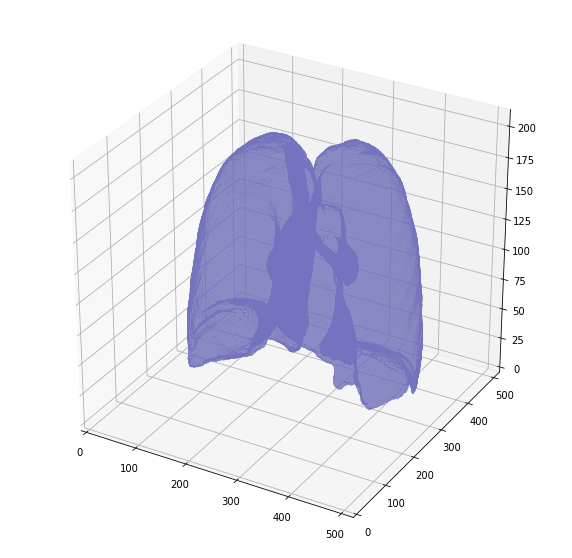

In [0]:
plot_3d(img, 0)

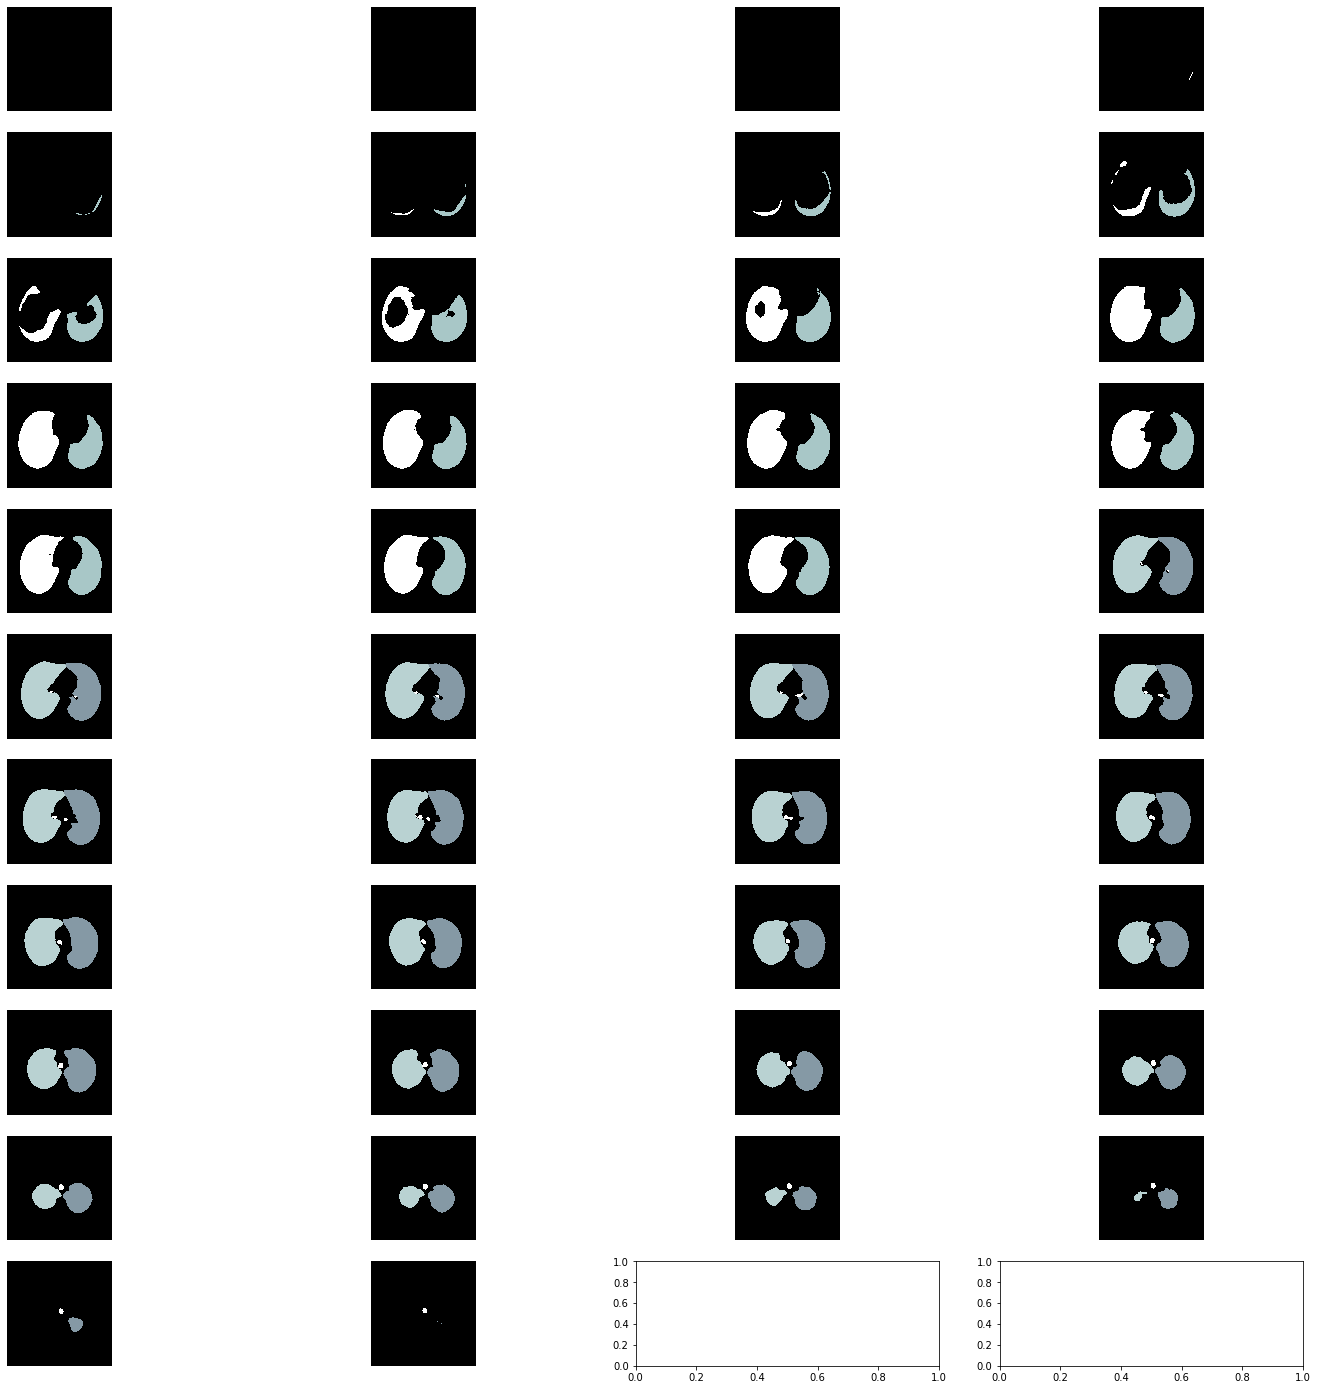

In [0]:
plot_ct_scan(img)

## Segmentation using Image Processing methods

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#p = sns.color_palette()
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

# Pandas configuration
pd.set_option('display.max_columns', None)


We will use a classical Image Processing technique: Morphological Transformation (Open, Close, Dilate, Erode).

The intuition here is the lung part is "darker" than the neighbors (HU > -300).

The segmented lung using this approach JUST FOR VISUALIZING ONLY because of these:

- if you don't you're loosing most of the information in the data 
- the specific values (for CT) have clinical significance and 
- you're not going to have a hope in hell of any clinical regulatory approval/use/testing/validation if you're not using the 16 bit data

In [0]:
base_path = '/content/drive/My Drive/LUNA2016'

import glob
import os
from fnmatch import fnmatch

root = os.path.join(base_path, 'dataset')
pattern = "*.mhd"

images_list = []
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            images_list.append(os.path.join(path, name))

In [0]:
print("Nof patients: ", len(set(images_list)))

Nof patients:  884


In [0]:
candidates.seriesuid.nunique()

888

We will need a slice that shows the lung clearly. For simplicity I'll chose the median index of the slices

In [0]:
load_image(images_list[0]).shape

(121, 512, 512)

In [0]:
import skimage
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from skimage.measure import label,regionprops, perimeter
from skimage.morphology import binary_dilation, binary_opening
from skimage.filters import roberts, sobel
from skimage import measure, feature
from skimage.segmentation import clear_border
from skimage import data
from scipy import ndimage as ndi

In [0]:
def get_segmented_lungs(im, plot=False):
    '''
    This funtion segments the lungs from the given 2D slice.
    '''
    if plot == True:
        f, plots = plt.subplots(8, 1, figsize=(5, 40))
    '''
    Step 1: Convert into a binary image. 
    '''
    binary = -320 < im 
    binary = ~binary
    if plot == True:
        plots[0].axis('off')
        plots[0].imshow(binary, cmap=plt.cm.bone) 
        plots[0].set_title('HU > -320 threshold')
    '''
    Step 2: Remove the blobs connected to the border of the image.
    '''
    cleared = clear_border(binary)
    if plot == True:
        plots[1].axis('off')
        plots[1].imshow(cleared, cmap=plt.cm.bone)
        plots[1].set_title('Clear border') 
    '''
    Step 3: Label the image.
    '''
    label_image = label(cleared)
    if plot == True:
        plots[2].axis('off')
        plots[2].imshow(label_image) 
        plots[2].set_title('Labeled blobs')
    '''
    Step 4: Keep the labels with 2 largest areas.
    '''
    areas = [r.area for r in regionprops(label_image)]
    areas.sort()
    if len(areas) > 2:
        for region in regionprops(label_image):
            if region.area < areas[-2]:
                for coordinates in region.coords:                
                       label_image[coordinates[0], coordinates[1]] = 0
    binary = label_image > 0
    if plot == True:
        plots[3].axis('off')
        plots[3].imshow(binary, cmap=plt.cm.bone) 
        plots[3].set_title('Keep 2 biggest blobs')
    '''
    Step 5: Erosion operation with a disk of radius 2. This operation is 
    seperate the lung nodules attached to the blood vessels.
    '''
    selem = disk(2)
    binary = binary_erosion(binary, selem)
    if plot == True:
        plots[4].axis('off')
        plots[4].imshow(binary, cmap=plt.cm.bone)
        plots[4].set_title('Erosion')
    '''
    Step 6: Closure operation with a disk of radius 10. This operation is 
    to keep nodules attached to the lung wall.
    '''
    selem = disk(10)
    binary = binary_closing(binary, selem)
    if plot == True:
        plots[5].axis('off')
        plots[5].imshow(binary, cmap=plt.cm.bone)
        plots[5].set_title('Closing') 
    '''
    Step 7: Fill in the small holes inside the binary mask of lungs.
    '''
    edges = roberts(binary)
    binary = ndi.binary_fill_holes(edges)
    if plot == True:
        plots[6].axis('off')
        plots[6].imshow(binary, cmap=plt.cm.bone) 
        plots[6].set_title('Fill holes')
    '''
    Step 8: Superimpose the binary mask on the input image.
    '''
    get_high_vals = binary == 0
    im[get_high_vals] = 0
    if plot == True:
        plots[7].axis('off')
        plots[7].imshow(im, cmap=plt.cm.bone) 
        plots[7].set_title('Apply the mask')
    return im


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

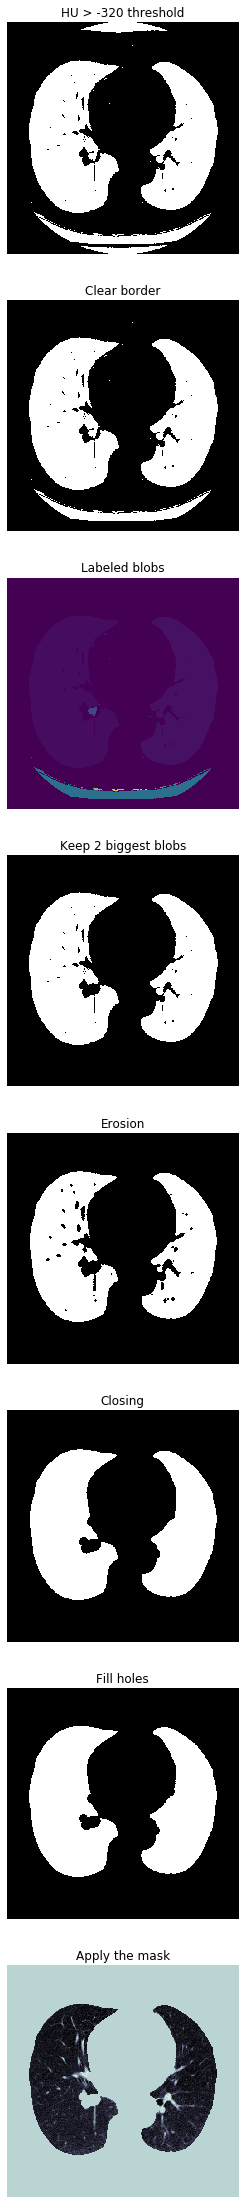

In [0]:
img = load_image(images_list[123])
img = img[img.shape[0] // 2]

get_segmented_lungs(img, True)

## Visualize in 3D

In [0]:
img = load_image(images_list[123])
for slice_ in range(img.shape[0]):
  img[slice_] = get_segmented_lungs(img[slice_])


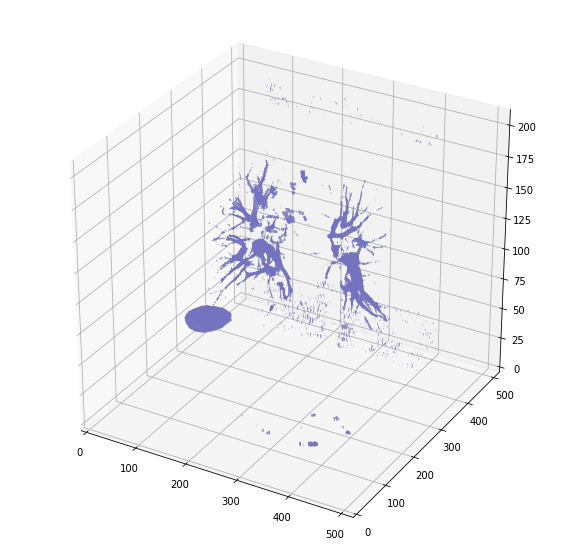

In [0]:
plot_3d(img, 0)

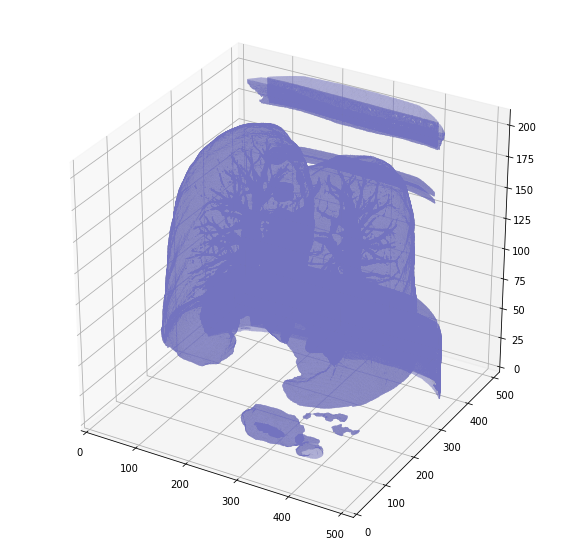

In [0]:
plot_3d(img, -320)

## U-Net

**U-Net**

![U-Net](https://github.com/LeeJunHyun/Image_Segmentation/blob/master/img/U-Net.png?raw=true)

In [0]:
input_path = images_list[119]
uid = os.path.split(input_path)[1][:-4]
uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.183184435049555024219115904825'

In [0]:
annotations[annotations['seriesuid'] == uid]

,seriesuid,coordX,coordY,coordZ,diameter_mm
316,1.3.6.1.4.1.14519.5.2.1.6279.6001.183184435049...,-71.709390,-47.089729,-218.416849,4.506690
317,1.3.6.1.4.1.14519.5.2.1.6279.6001.183184435049...,34.652929,18.541730,-79.084230,4.812693


In [0]:
candidates[(candidates['seriesuid'] == uid) & (candidates['class'] == 1)]

,seriesuid,coordX,coordY,coordZ,class
207382,1.3.6.1.4.1.14519.5.2.1.6279.6001.183184435049...,34.601754,18.300204,-78.675,1
207958,1.3.6.1.4.1.14519.5.2.1.6279.6001.183184435049...,-71.649853,-47.194422,-219.045,1


# Lung Nodules Classification

## Define input / output layers

## Convert WorldCoord to VoxelCoord

In [0]:
img_path = images_list[0]

uid = os.path.split(img_path)[1][:-4]

uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260'

In [0]:
cand = candidates[candidates['seriesuid'] == uid]

cand_ = cand.iloc[0]
worldCoord = [cand_['coordX'], cand_['coordY'], cand_['coordZ']]
worldCoord

[-66.38310713, 57.14360669, -60.88586227]

In [0]:
cand

,seriesuid,coordX,coordY,coordZ,class
11673,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,-66.383107,57.143607,-60.885862,0
11674,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,-132.856859,23.813034,-274.350845,0
11675,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,84.770000,66.170000,-249.880000,0
11676,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,134.805360,29.696241,-268.116009,0
11677,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,-87.092676,41.722383,-208.831394,0
...,...,...,...,...,...
12375,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,45.951782,39.034381,-236.163760,0
12376,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,-75.889572,-0.536892,-227.004980,0
12377,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,-55.762728,24.343028,-174.317882,0
12378,1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031...,92.683604,82.690552,-234.445892,0


In [0]:
numpyImage, numpyOrigin, numpySpacing = load_itk_image(img_path)

In [0]:
numpyImage.shape

(121, 512, 512)

In [0]:
worldToVoxelCoord(worldCoord, numpyOrigin, numpySpacing)

array([107.53075355, 331.01919543, 180.13748615])

## Model Training

In [0]:
data_labels = candidates.groupby('seriesuid').agg({'class': np.max})
data_labels = data_labels.reset_index(level=0)
data_labels

,seriesuid,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,1
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840...,0
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,1
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.100530488926...,0
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.100620385482...,0
...,...,...
883,1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707...,1
884,1.3.6.1.4.1.14519.5.2.1.6279.6001.980362852713...,0
885,1.3.6.1.4.1.14519.5.2.1.6279.6001.986011151772...,0
886,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,1


In [0]:
data_labels[data_labels['class'] == 1]

,seriesuid,class
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222...,1
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.100398138793...,1
5,1.3.6.1.4.1.14519.5.2.1.6279.6001.100621383016...,1
7,1.3.6.1.4.1.14519.5.2.1.6279.6001.100953483028...,1
10,1.3.6.1.4.1.14519.5.2.1.6279.6001.102681962408...,1
...,...,...
880,1.3.6.1.4.1.14519.5.2.1.6279.6001.970428941353...,1
882,1.3.6.1.4.1.14519.5.2.1.6279.6001.975426625618...,1
883,1.3.6.1.4.1.14519.5.2.1.6279.6001.979083010707...,1
886,1.3.6.1.4.1.14519.5.2.1.6279.6001.994459772950...,1


## DenseNet

In [0]:
import keras 
import tensorflow as tf
from tensorflow.python.client import timeline
from keras.datasets import cifar10 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import load_model
import keras.backend as K

In [0]:
from keras.layers import Input, Dense, Dropout, Activation, Concatenate, BatchNormalization
from keras.models import Model
from keras.layers import Conv2D, GlobalAveragePooling2D, AveragePooling2D
from keras.regularizers import l2



def DenseNet(input_shape=None, dense_blocks=3, dense_layers=-1, growth_rate=12, nb_classes=None, dropout_rate=None,
             bottleneck=False, compression=1.0, weight_decay=1e-4, depth=40):
    """
    Creating a DenseNet
    
    Arguments:
        input_shape  : shape of the input images. E.g. (28,28,1) for MNIST    
        dense_blocks : amount of dense blocks that will be created (default: 3)    
        dense_layers : number of layers in each dense block. You can also use a list for numbers of layers [2,4,3]
                       or define only 2 to add 2 layers at all dense blocks. -1 means that dense_layers will be calculated
                       by the given depth (default: -1)
        growth_rate  : number of filters to add per dense block (default: 12)
        nb_classes   : number of classes
        dropout_rate : defines the dropout rate that is accomplished after each conv layer (except the first one).
                       In the paper the authors recommend a dropout of 0.2 (default: None)
        bottleneck   : (True / False) if true it will be added in convolution block (default: False)
        compression  : reduce the number of feature-maps at transition layer. In the paper the authors recomment a compression
                       of 0.5 (default: 1.0 - will have no compression effect)
        weight_decay : weight decay of L2 regularization on weights (default: 1e-4)
        depth        : number or layers (default: 40)
        
    Returns:
        Model        : A Keras model instance
    """
    
    if nb_classes==None:
        raise Exception('Please define number of classes (e.g. num_classes=10). This is required for final softmax.')
    
    if compression <=0.0 or compression > 1.0:
        raise Exception('Compression have to be a value between 0.0 and 1.0. If you set compression to 1.0 it will be turn off.')
    
    if type(dense_layers) is list:
        if len(dense_layers) != dense_blocks:
            raise AssertionError('Number of dense blocks have to be same length to specified layers')
    elif dense_layers == -1:
        if bottleneck:
            dense_layers = (depth - (dense_blocks + 1))/dense_blocks // 2
        else:
            dense_layers = (depth - (dense_blocks + 1))//dense_blocks
        dense_layers = [int(dense_layers) for _ in range(dense_blocks)]
    else:
        dense_layers = [int(dense_layers) for _ in range(dense_blocks)]
        
    img_input = Input(shape=input_shape)
    nb_channels = growth_rate * 2
    
    print('Creating DenseNet')
    print('#############################################')
    print('Dense blocks: %s' % dense_blocks)
    print('Layers per dense block: %s' % dense_layers)
    print('#############################################')
    
    # Initial convolution layer
    x = Conv2D(nb_channels, (3,3), padding='same',strides=(1,1),
                      use_bias=False, kernel_regularizer=l2(weight_decay))(img_input)
    
    # Building dense blocks
    for block in range(dense_blocks):
        
        # Add dense block
        x, nb_channels = dense_block(x, dense_layers[block], nb_channels, growth_rate, dropout_rate, bottleneck, weight_decay)
        
        if block < dense_blocks - 1:  # if it's not the last dense block
            # Add transition_block
            x = transition_layer(x, nb_channels, dropout_rate, compression, weight_decay)
            nb_channels = int(nb_channels * compression)
    
    x = BatchNormalization(gamma_regularizer=l2(weight_decay), beta_regularizer=l2(weight_decay))(x)
    x = Activation('relu')(x)
    x = GlobalAveragePooling2D()(x)
    
    x = Dense(nb_classes, activation='softmax', kernel_regularizer=l2(weight_decay), bias_regularizer=l2(weight_decay))(x)
    
    model_name = None
    if growth_rate >= 36:
        model_name = 'widedense'
    else:
        model_name = 'dense'
        
    if bottleneck:
        model_name = model_name + 'b'
        
    if compression < 1.0:
        model_name = model_name + 'c'
        
    return Model(img_input, x, name=model_name), model_name


In [0]:
def dense_block(x, nb_layers, nb_channels, growth_rate, dropout_rate=None, bottleneck=False, weight_decay=1e-4):
    """
    Creates a dense block and concatenates inputs
    """
    
    x_list = [x]
    for i in range(nb_layers):
        cb = convolution_block(x, growth_rate, dropout_rate, bottleneck, weight_decay)
        x_list.append(cb)
        x = Concatenate(axis=-1)(x_list)
        nb_channels += growth_rate
    return x, nb_channels


def convolution_block(x, nb_channels, dropout_rate=None, bottleneck=False, weight_decay=1e-4):
    """
    Creates a convolution block consisting of BN-ReLU-Conv.
    Optional: bottleneck, dropout
    """
    
    # Bottleneck
    if bottleneck:
        bottleneckWidth = 4
        x = BatchNormalization(gamma_regularizer=l2(weight_decay), beta_regularizer=l2(weight_decay))(x)
        x = Activation('relu')(x)
        x = Conv2D(nb_channels * bottleneckWidth, (1, 1), use_bias=False, kernel_regularizer=l2(weight_decay))(x)
        # Dropout
        if dropout_rate:
            x = Dropout(dropout_rate)(x)
    
    # Standard (BN-ReLU-Conv)
    x = BatchNormalization(gamma_regularizer=l2(weight_decay), beta_regularizer=l2(weight_decay))(x)
    x = Activation('relu')(x)
    x = Conv2D(nb_channels, (3, 3), padding='same', use_bias=False, kernel_regularizer=l2(weight_decay))(x)
    
    # Dropout
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    
    return x



In [0]:
def transition_layer(x, nb_channels, dropout_rate=None, compression=1.0, weight_decay=1e-4):
    """
    Creates a transition layer between dense blocks as transition, which do convolution and pooling.
    Works as downsampling.
    """
    
    x = BatchNormalization(gamma_regularizer=l2(weight_decay), beta_regularizer=l2(weight_decay))(x)
    x = Activation('relu')(x)
    x = Conv2D(int(nb_channels*compression), (1, 1), padding='same',
                      use_bias=False, kernel_regularizer=l2(weight_decay))(x)
    
    # Adding dropout
    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    
    x = AveragePooling2D((2, 2), strides=(2, 2))(x)
    return x

In [0]:
model, model_name = DenseNet(input_shape=(95,512,512),
                 nb_classes=1)

Creating DenseNet
#############################################
Dense blocks: 3
Layers per dense block: [12, 12, 12]
#############################################


### Preprocessing

In [0]:
def preprocess_data(img_path):
  img = load_image(img_path)
  return array_slicing(img)

In [0]:
def array_slicing(array, nof_dims=95):
  array_dims = array.shape[0]
  if array_dims >= nof_dims:
    slice_id = int((array_dims - nof_dims) / 2)
    return array[slice_id : array_dims - slice_id] if array_dims % 2 == 1 else array[slice_id : array_dims - slice_id -1]

In [0]:
array_slicing(load_image(images_list[123])).shape

(95, 512, 512)

In [0]:
array_slicing(load_image(images_list[0])).shape

(95, 512, 512)

In [0]:
def image_generator(files, data_labels, batch_size=1):
  while True:
    batch_paths = np.random.choice(a=files, size=batch_size)
    batch_input = []
    batch_output = []

    for input_path in batch_paths:
      input_ = preprocess_data(input_path)
      uid = os.path.split(input_path)[1][:-4]
      # print(uid)
      label_ = data_labels[data_labels['seriesuid'] == str(uid)]
      # print(label_)
      if not label_.empty:
        batch_input += [input_]
        batch_output += [label_.reset_index().iloc[0]['class']]

    batch_x = np.array(batch_input)
    batch_y = np.array(batch_output)

    yield(batch_x, batch_y)

### Model fitting

In [0]:
input_path = images_list[0]
uid = os.path.split(input_path)[1][:-4]
uid

'1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260'

In [0]:
label_ = data_labels[data_labels['seriesuid'] == uid]['class']
label_

15    0
Name: class, dtype: int64

In [0]:
from keras.callbacks import TensorBoard, LearningRateScheduler, ModelCheckpoint


In [0]:
learning_rate = 1e-3,
lr_decay_ratio = 0.1

In [0]:
opt = keras.optimizers.SGD(lr=learning_rate, momentum=0.9, nesterov=True) 

model.compile(loss='binary_crossentropy', 
              optimizer=opt, 
              metrics=['accuracy'])
model.summary()

Model: "dense"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 95, 512, 512) 0                                            
__________________________________________________________________________________________________
conv2d_196 (Conv2D)             (None, 95, 512, 24)  110592      input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_196 (BatchN (None, 95, 512, 24)  96          conv2d_196[0][0]                 
__________________________________________________________________________________________________
activation_196 (Activation)     (None, 95, 512, 24)  0           batch_normalization_196[0][0]    
______________________________________________________________________________________________

In [0]:
def train_model():
  # checkpoint
  callbacks_list = []
  file_name = model_name + 'model-ep{epoch:04d}-loss{loss:.3f}-acc{acc:.3f}-val_loss{val_loss:.3f}-val_acc{val_acc:.3f}.h5'
  filepath = os.path.join(base_path, 'models', file_name)

  callbacks_list.append(ModelCheckpoint(filepath, monitor='val_acc', 
                                        verbose=0, save_best_only=True, mode='max'))
  
  # Tensorboard
  logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
  callbacks_list.append(keras.callbacks.TensorBoard(logdir, histogram_freq=0))

  model.fit(image_generator(training_list, data_labels, batch_size=1),
            verbose=1, 
            epochs=20,
            steps_per_epoch=100,
            validation_data=image_generator(training_list, data_labels, batch_size=1),
            validation_steps=100,
            callbacks=callbacks_list,
            )

In [0]:
from keras.callbacks import ModelCheckpoint, TensorBoard
from datetime import datetime

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
%tensorboard --logdir logs


In [0]:
train_model()

Epoch 1/20
 84/100 [========================>.....] - ETA: 55s - loss: 5.6237 - acc: 0.7143

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:709: UserWarning: An input could not be retrieved. It could be because a worker has died.We do not have any information on the lost sample.
  UserWarning)


100/100 [==============================] - 648s 6s/step - loss: 5.6920 - acc: 0.7100 - val_loss: 5.6918 - val_acc: 0.7100

Epoch 2/20
100/100 [==============================] - 563s 6s/step - loss: 7.7641 - acc: 0.5800 - val_loss: 6.6479 - val_acc: 0.6500
Epoch 3/20
100/100 [==============================] - 640s 6s/step - loss: 5.2129 - acc: 0.7400 - val_loss: 6.0098 - val_acc: 0.6900
Epoch 4/20
100/100 [==============================] - 638s 6s/step - loss: 6.0096 - acc: 0.6900 - val_loss: 5.6905 - val_acc: 0.7100
Epoch 5/20
100/100 [==============================] - 650s 7s/step - loss: 5.8497 - acc: 0.7000 - val_loss: 6.0089 - val_acc: 0.6900
Epoch 6/20
100/100 [==============================] - 661s 7s/step - loss: 5.8493 - acc: 0.7000 - val_loss: 5.0520 - val_acc: 0.7500
Epoch 7/20
100/100 [==============================] - 652s 7s/step - loss: 5.8489 - acc: 0.7000 - val_loss: 5.6892 - val_acc: 0.7100
Epoch 8/20
100/100 [==============================] - 642s 6s/step - loss: 6.96

### Prediction and Classification Report

In [0]:
from sklearn.metrics import classification_report

X_test, y_test = image_generator(test_list, data_labels)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))